In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
from prophet import Prophet
from matplotlib import pyplot as plt
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.metrics import mean_squared_error, r2_score
from prophet.plot import plot_cross_validation_metric

In [38]:
csv = pd.read_csv("/content/Global_Superstore1.csv")
csv


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9.0,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5.0,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8.0,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31149,4128,MX-2013-137729,03-05-2013,07-05-2013,Standard Class,SC-20380,Shahid Collister,Consumer,Caracas,Distrito Capital,...,OFF-PA-10003571,Office Supplies,Paper,"Enermax Cards & Envelopes, Recycled",94.020,5.0,0.4,-59.5800,5.01,Medium
31150,9425,MX-2014-112305,31-10-2014,06-11-2014,Standard Class,CK-12325,Christine Kargatis,Home Office,Santa Cruz de Barahona,Barahona,...,OFF-PA-10002464,Office Supplies,Paper,"Green Bar Computer Printout Paper, Multicolor",49.872,3.0,0.2,-7.4880,5.01,Medium
31151,3516,US-2012-166856,19-03-2012,26-03-2012,Standard Class,RB-19570,Rob Beeghly,Consumer,Tegucigalpa,Francisco Morazn,...,FUR-FU-10003622,Furniture,Furnishings,"Tenex Light Bulb, Erganomic",63.180,9.0,0.4,-32.7600,5.01,Low
31152,10219,US-2012-131793,04-12-2012,07-12-2012,Second Class,MH-17620,Matt Hagelstein,Corporate,Bezerros,Pernambuco,...,OFF-ST-10001513,Office Supplies,Storage,"Fellowes Folders, Blue",49.280,7.0,0.6,-42.0000,5.00,Medium


In [39]:
csv.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

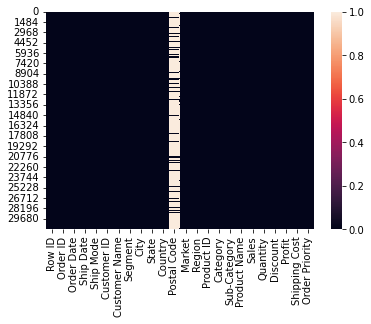

In [40]:
# Checking the null values
sns.heatmap(csv.isnull())

In [41]:
csv.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               1
Postal Code       26124
Market                1
Region                1
Product ID            1
Category              1
Sub-Category          1
Product Name          1
Sales                 1
Quantity              1
Discount              1
Profit                1
Shipping Cost         1
Order Priority        1
dtype: int64

In [42]:
# replacing the null values to 0 in sales column & profit
csv["Sales"].fillna("0", inplace = True)
csv["Profit"].fillna("0", inplace = True)

csv.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               1
Postal Code       26124
Market                1
Region                1
Product ID            1
Category              1
Sub-Category          1
Product Name          1
Sales                 0
Quantity              1
Discount              1
Profit                0
Shipping Cost         1
Order Priority        1
dtype: int64

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpakhb2gkd/7moimlcs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpakhb2gkd/v_vn3ozk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27458', 'data', 'file=/tmp/tmpakhb2gkd/7moimlcs.json', 'init=/tmp/tmpakhb2gkd/v_vn3ozk.json', 'output', 'file=/tmp/tmpakhb2gkd/prophet_modellhlbvnpb/prophet_model-20221118100633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:06:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:06:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


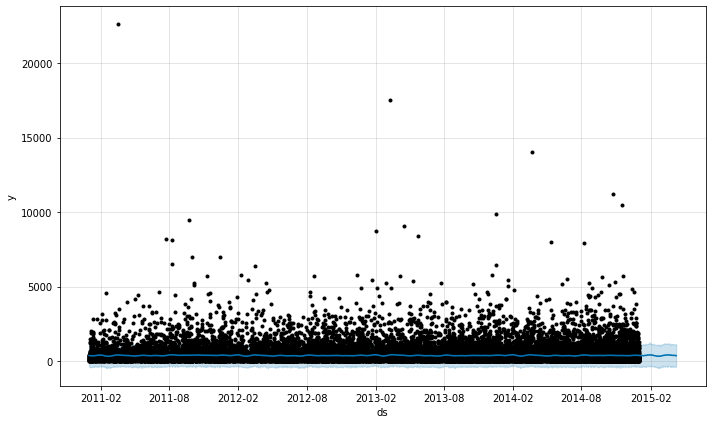

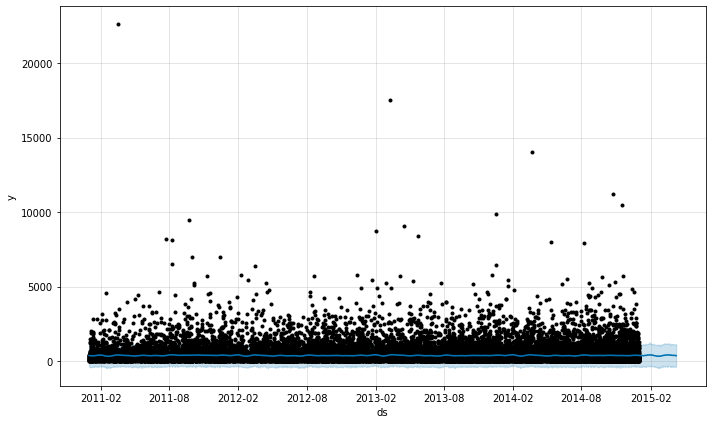

In [43]:
# Making the data frame for prediction future sales


predict_days = 100

data = csv[['Order Date', 'Sales']]


data.columns = ["ds", "y"]

# model
model = Prophet()
model.fit(data)

# predict
future = model.make_future_dataframe(periods=predict_days)
# print(future)

# forcast
forcast = model.predict(future)

# print(forcast[["ds", "yhat"]])
model.plot(forcast)


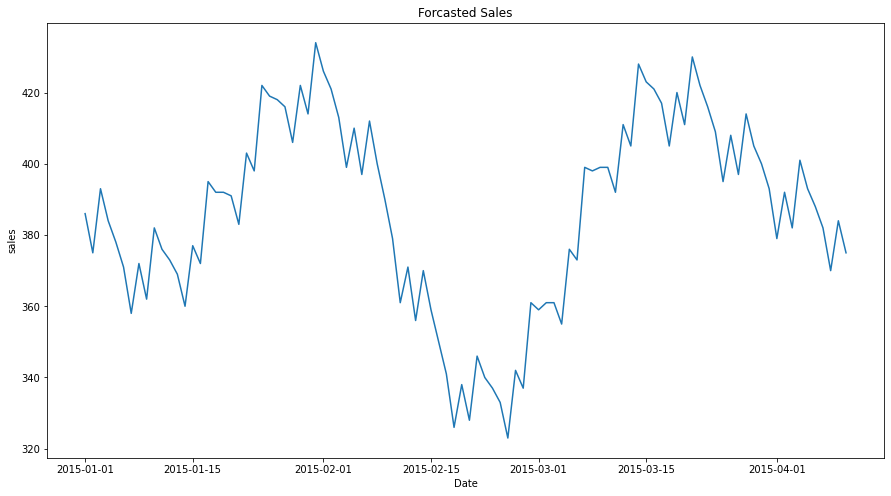

In [44]:
predict_ion = pd.DataFrame()
predict_ion["date"] = list(forcast.tail(predict_days)["ds"])
predict_ion["predict"] = list(forcast.tail(predict_days)["yhat"].astype(int))

# Making the graph
plt.figure(figsize=(15,8))
plt.plot(predict_ion["date"], predict_ion["predict"] )
plt.xlabel("Date")  # add X-axis label
plt.ylabel("sales")  # add Y-axis label
plt.title("Forcasted Sales")  # add title
plt.show()

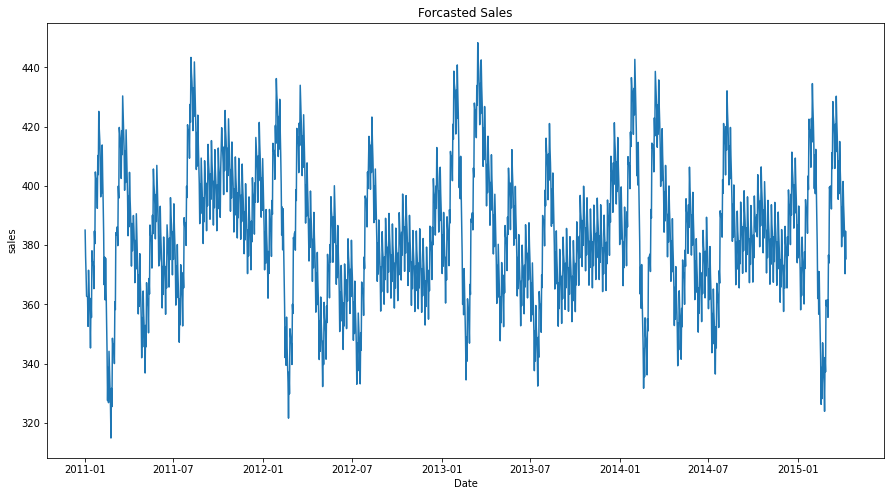

In [54]:

# Actual vs Predicted

# Making the graph
plt.figure(figsize=(15,8))
plt.plot(forcast["ds"], forcast["yhat"] )
plt.xlabel("Date")  # add X-axis label
plt.ylabel("sales")  # add Y-axis label
plt.title("Total Forcasted Sales")  # add title
plt.show()

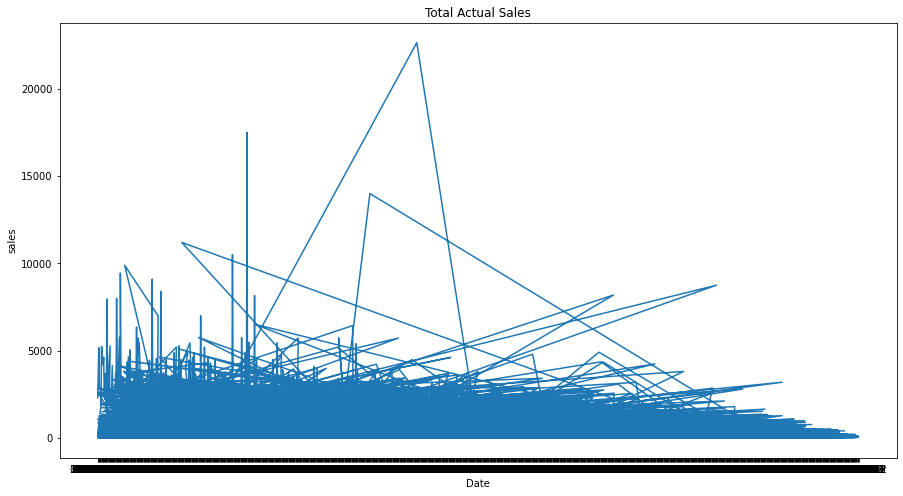

In [56]:
# Making the graph
# actual
plt.figure(figsize=(15,8))
plt.plot(data["ds"], data["y"] )
plt.xlabel("Date")  # add X-axis label
plt.ylabel("sales")  # add Y-axis label
plt.title("Total Actual Sales")  # add title
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpakhb2gkd/k7ogmsqc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpakhb2gkd/i_3olkbx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93709', 'data', 'file=/tmp/tmpakhb2gkd/k7ogmsqc.json', 'init=/tmp/tmpakhb2gkd/i_3olkbx.json', 'output', 'file=/tmp/tmpakhb2gkd/prophet_modelqxdbiip4/prophet_model-20221118101742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:17:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:17:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


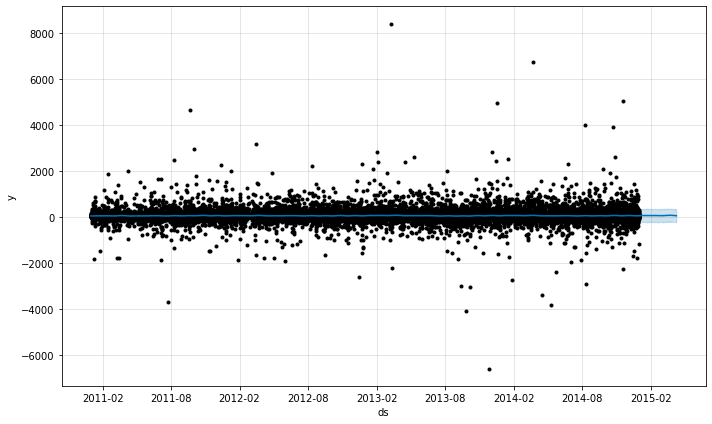

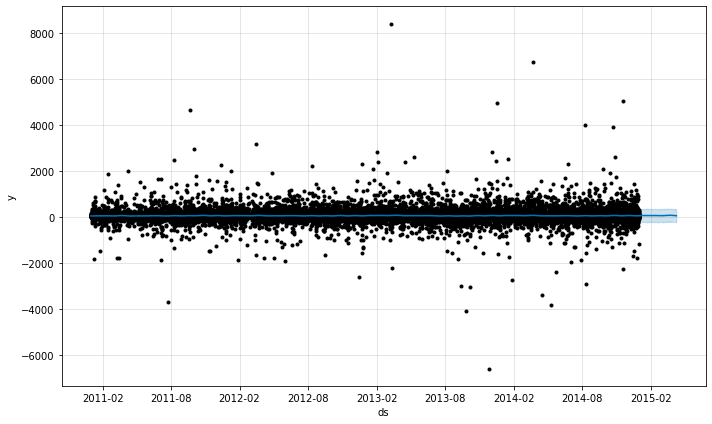

In [59]:




# Profit making
# Making the data frame for prediction future sales



data1 = csv[['Order Date', 'Profit']]


data1.columns = ["ds", "y"]

# model
model1 = Prophet()
model1.fit(data1)

# predict
future1 = model1.make_future_dataframe(periods=predict_days)
# print(future)

# forcast1
forcast1 = model1.predict(future1)

# print(forcast1[["ds", "yhat"]])
model1.plot(forcast1)


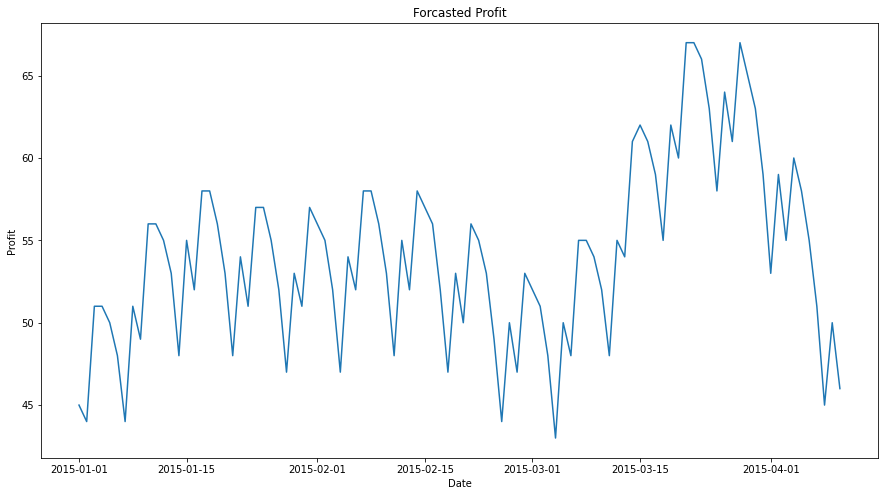

In [60]:
predict_ion1 = pd.DataFrame()
predict_ion1["date"] = list(forcast1.tail(predict_days)["ds"])
predict_ion1["predict"] = list(forcast1.tail(predict_days)["yhat"].astype(int))

# Making the graph
plt.figure(figsize=(15,8))
plt.plot(predict_ion1["date"], predict_ion1["predict"] )
plt.xlabel("Date")  # add X-axis label
plt.ylabel("Profit")  # add Y-axis label
plt.title("Forcasted Profit")  # add title
plt.show()

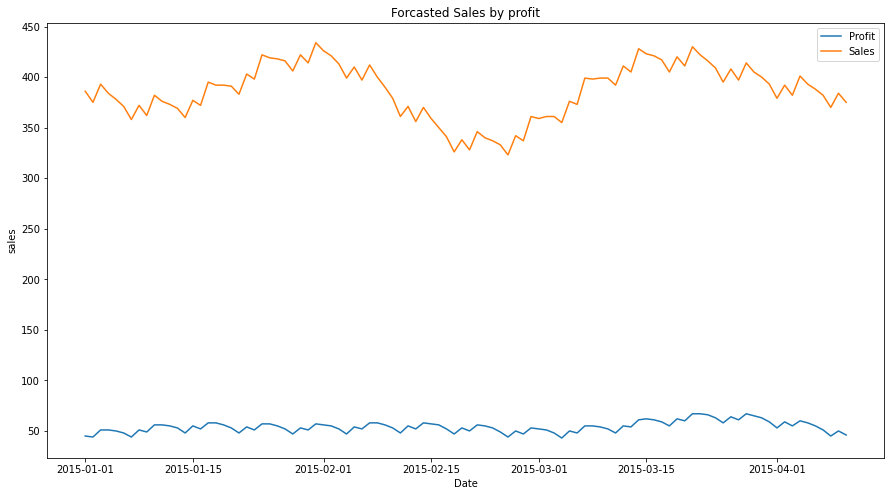

In [62]:

#  sales by profit

# Making the graph
plt.figure(figsize=(15,8))
plt.plot(predict_ion1["date"], predict_ion1["predict"] )
plt.plot(predict_ion["date"], predict_ion["predict"] )
plt.xlabel("Date")  # add X-axis label
plt.ylabel("sales")  # add Y-axis label
plt.legend(['Profit','Sales'])
plt.title("Forcasted Sales by profit") # add title
plt.show()